<a href="https://colab.research.google.com/github/PutriAW/DTI-ASSIGNMENT-LINEAR-REGRESSION/blob/main/Multiple_Linear_Regression_for_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiple Linear Regression for Pie Sales Data**
Created By Putri Apriyanti Windya 
 (DS0124 - Data Scientist 01)

# **Description**

---


There are 15 rows in pie-sales.csv. It has 4 major variables, there are:


*   week : week- n
*   sales : number of sold out pie at week-n
*  price : price for one item
* advetising : advertising cost 



# **Problem to Solve**

---


owner want to know the prediction of sales based on price and advertising by using multiple linear regression.



# **Data Exploration**



**Import All Libraries that Needed**

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import Dataset from this link https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv** 

In [3]:
datas = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
datas

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


**Plot Data to Check pie_sales frequency**

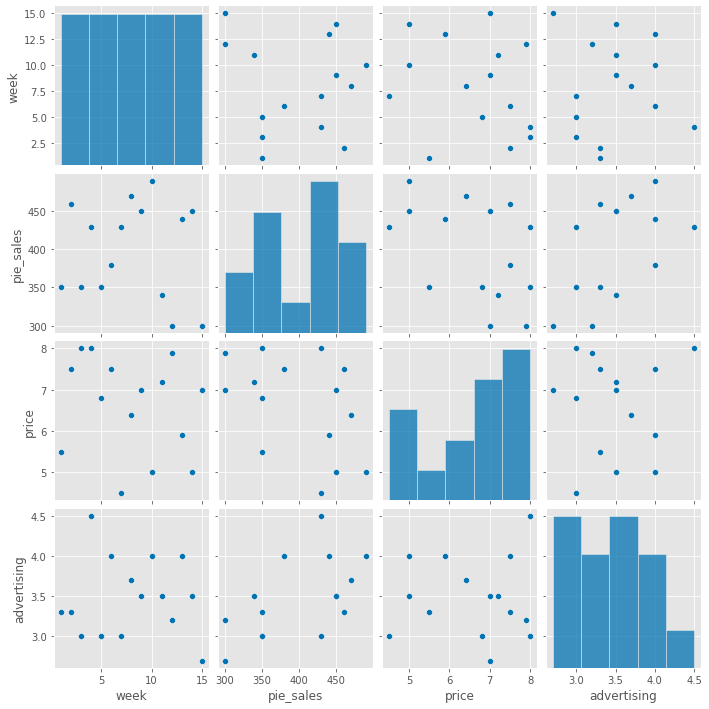

In [18]:
# plot all data
sns.set_palette('colorblind')
sns.pairplot(data=datas)

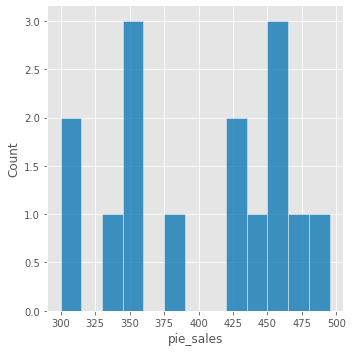

In [21]:
# plot pie_sales data using histogram to check it frequency
sns.displot(datas, x="pie_sales", binwidth=15)


**Check Correlation Between Variables using sns**

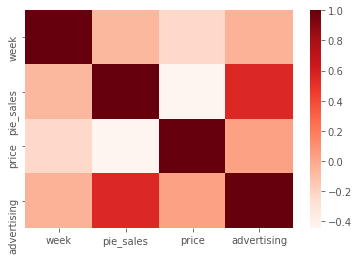

In [5]:
'''check all correlation between variables to take next step. when the color closed to 1 its means that the correlation is positive 
and if the color closed to -0.4 its means that the correlation is negative
''' 
sns.heatmap(datas.corr(), cmap='Reds')

In [32]:
#Display Correlation Value of Price and Advertising to pie_sales
print("Correlation between Price and Pie_sales : ",datas.price.corr(datas.pie_sales))
print("Correlation between Advertising and Pie_sales : ",datas.advertising.corr(datas.pie_sales))

Correlation between Price and Pie_sales :  -0.4432731827387206
Correlation between Advertising and Pie_sales :  0.556319857168117


**Visualize Data**

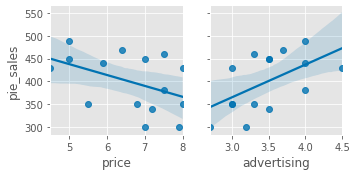

In [13]:
# plot price and advertising to prove it's positive and negative correlation
x = datas[['price','advertising']] 
y = datas['pie_sales']
PairPlot = sns.PairGrid(datas, x_vars=['price','advertising'], y_vars=['pie_sales'])
PairPlot.map(sns.regplot)

* From plot above we can conclude that price has negative correlation to pie sales, which means that when price decreased so pie_sales will be increased
* from right one plot (Plot between pie_sales and advertising), we can conclude that advertising has positive correlation to pie_sales, which means that when we increase advertising so pie sales will be increase too.

# Modelling Solution

**Regression Using Sklearn**

In [25]:
# from variable x and y above, we will try it to multiple regression function
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Display intercept and Coefficient 
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]




*   Intercept (often labeled the constant) is the expected mean value of Y when all X=0.Start with a regression equation with one predictor, X.If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. If X never equals 0, then the intercept has no intrinsic meaning. In scientific research, the purpose of a regression model is to understand the relationship between predictors and the response.  If so, and if X never = 0, there is no interest in the intercept. It doesn’t tell you anything about the relationship between X and Y.
*   Coefficients are the values that multiply the predictor values.
The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

 - A positive sign indicates that as the predictor variable increases, the response variable also increases.
 - A negative sign indicates that as the predictor variable increases, the response variable decreases.



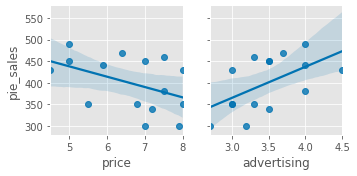

In [27]:
# visualize again
PairPlot = sns.PairGrid(datas, x_vars=['price','advertising'], y_vars=['pie_sales'])
PairPlot.map(sns.regplot)

We have 2 independent variable namely price and advertising which means there are 2 $\beta$ in this regression. So, we can get this population multiple regression model: 
> $y = \beta_0$ + $\beta_1$*$x_1$ + $\beta_2$*$x_2$ + $\epsilon$

Explanation:


*   $\beta_0$ : Y-Intercept
*   $\beta_1$*$x_1$, ...., $\beta_2$*$x_n$ : Population Slopes
*$\epsilon$ : Random error

> $y = 306.5261932837436-24.97508952*price +  74.13095749*advertising + \epsilon$

Estimated Multiple Regression Model
>  $\hat{y} = b_0 + b_1*x_1 + b_2*x_2$ 

explanation:


*   $\hat{y}$ : Estimated value of Y
*   $b_0$ : Estimated intercept
* $b_0 ,..., b_1$ :Estimated slope Coeficient


>$\hat{y} = 306.5261932837436-24.97508952*price +  74.13095749*advertising $









**Regression Using Statsmodels**

In [30]:
# adding a constant
x_int = sm.add_constant(x) 

In [ ]:
model = sm.OLS(y, x_int).fit()
predictions = model.predict() 


# **Evaluation**

In [33]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:39:19   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable.
Based on summary above we can get R-Squared ($R^2$) value, 0.521.  which means our model can predict pie_sales using 2 independent variables price and advertising around 52,1 % and 48% influenced by another variable.

In [42]:
# prediction with sklearn
pr = float(input("Input Price : "))
ad = float(input("Input Advertising :"))

y = 306.5261932837436 - 24.97508952 * pr + 74.13095749 * ad

print("Predicted Pie_sales : ", y)


Input Price : 8.6
Input Advertising :4.6
Predicted Pie_sales :  432.7428278657436


**Reference**


*   https://seaborn.pydata.org/tutorial/regression.html
*   https://seaborn.pydata.org/tutorial/distributions.html
*  https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/#:~:text=The%20intercept%20
* https://www.investopedia.com/terms/r/r-squared.asp
*https://statisticsbyjim.com/glossary/regression-coefficient/

